In [8]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
subject = pd.read_csv("/home/sachin/Desktop/DPSA/Teacher-Evaluvation/data/subjects.csv")
student = pd.read_csv("/home/sachin/Desktop/DPSA/Teacher-Evaluvation/data/students.csv")
feedback = pd.read_csv("/home/sachin/Desktop/DPSA/Teacher-Evaluvation/data/student_feedbacks.csv")

In [4]:
subject.head()

,Semester_ID,Subject_Code,Subject_Name,Teacher_ID,Course_Credits,Semester,Student_Year_Taught,Programme,Department,Class_Size
0,S001,DA127,Machine Learning Basics,T002,3,II,1st Year,Data Science,M.Sc.,60
1,S002,DA303,Natural Language Processing,T005,3,II,1st Year,Data Science,M.Sc.,60
2,S003,DA765,Data Mining,T001,3,II,1st Year,Data Science,M.Sc.,60
3,S004,DA384,Machine Learning Basics,T001,2,IV,2nd Year,Data Science,M.Sc.,51
4,S005,DA877,Deep Learning,T002,2,IV,2nd Year,Data Science,M.Sc.,51


In [5]:
student.head()

,Student_ID,Student_Year,Programme,Department,Gender
0,STU001,1st Year,Data Science,M.Sc.,Male
1,STU002,1st Year,Data Science,M.Sc.,Male
2,STU003,1st Year,Data Science,M.Sc.,Female
3,STU004,1st Year,Data Science,M.Sc.,Male
4,STU005,1st Year,Data Science,M.Sc.,Male


In [ ]:
feedback.head()

,Feedback_ID,Subject_Code,Student_ID,Semester_ID,Clarity_of_Explanation,Subject_Knowledge_of_Teacher,Engagement_in_Class,Encouragement_of_Participation,Fairness_in_Grading,Timely_Feedback_on_Assignments,Availability_for_Doubts_Outside_Class,Use_of_Teaching_Aids_Technology,Classroom_Management,Pacing_of_Course,Relevance_of_Course_Material,Encouragement_of_Critical_Thinking,Respectful_and_Inclusive_Environment,Adjustment_to_Student_Confusion,Overall_Teaching_Effectiveness
0,F0001,DA127,STU001,S001,3,5,4,1,1,5,5,4,3,5,5,4,3,3,4
1,F0002,DA303,STU001,S002,4,4,3,3,4,4,5,5,5,5,5,5,5,5,5
2,F0003,DA765,STU001,S003,5,4,2,3,4,4,3,4,4,2,5,3,5,3,4
3,F0004,DA127,STU002,S001,5,4,3,5,5,5,3,2,3,4,5,5,4,5,4
4,F0005,DA303,STU002,S002,3,4,5,5,3,4,4,5,4,5,4,4,5,5,4


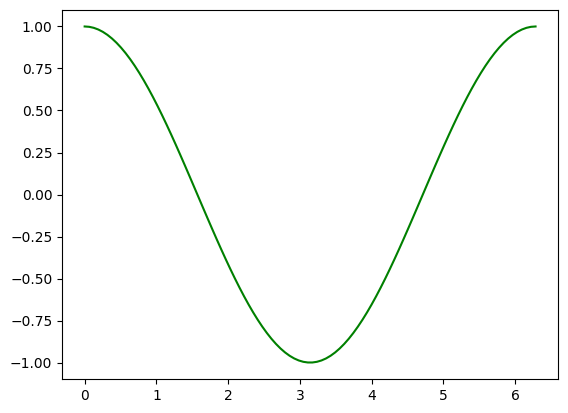

In [10]:
X = np.linspace(0,2*np.pi, 100)
Y = np.cos(X)

fig, ax = plt.subplots()
ax.plot(X,Y, color='green')

fig.savefig("figure.pdf")
plt.show()

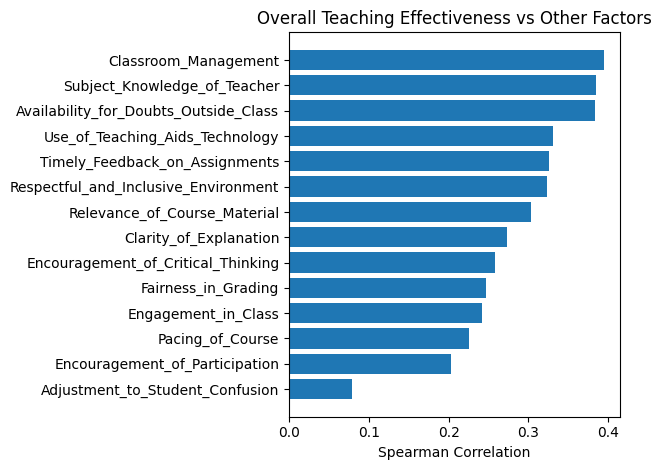

In [ ]:
import matplotlib.pyplot as plt

corr = (
    feedback.corr(method="spearman", numeric_only=True)
    ["Overall_Teaching_Effectiveness"]
    .drop("Overall_Teaching_Effectiveness")
    .sort_values()
)

plt.figure()
plt.barh(corr.index, corr.values)
plt.xlabel("Spearman Correlation")
plt.title("Overall Teaching Effectiveness vs Other Factors")
plt.tight_layout()
plt.show()


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Select features and target
X = feedback.drop(columns=[
    "Overall_Teaching_Effectiveness",
    "Feedback_ID",
    "Subject_Code",
    "Student_ID",
    "Semester_ID"
])

y = feedback["Overall_Teaching_Effectiveness"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
